# import

In [1]:
import sys
from utilities import *
from my_TransmonCrossTeeth import myTransmonNewCrosswTeeth
from myLogicalQubit import LogicalQubit
from my_launchpad_wb import myLaunchpadWirebond
#from prettytable import PrettyTable


In [2]:
def convert_str_to_um(string):
    if string[-2:] == 'um':
        return float(string[:-2])

def add_length_in_str(alist):
    length = [convert_str_to_um(a) for a in alist]
    return str(sum(length)) + alist[0][-2:]

In [3]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
# from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross as qiskitTransmonCross
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.lumped.cap_n_interdigital import CapNInterdigital
from collections import OrderedDict

In [4]:
## global settings
pad_width = '400um' # wire bond width
pad_height = '120um'
pad_trace_gap = '6um'
lead_length = '40um'
taper_height = '132um'


"""
characteristic parameters in this design
"""
diss_termination_claw_length = '180um'
diss_termination_claw_width = '20um'
diss_res_ground_spacing = '8um'
diss_resonator_claw_ground_spacing = '5um'
jj_inductance_top = '2.36nH' # target dispator frequency 10 GHz, was 3.4
jj_inductance_bottom = '2.3nH' # target dissipator frequency 13 GHz

In [5]:
design = designs.DesignPlanar({}, True)

design._chips['main']['size']['size_x'] = '4.8mm'
design._chips['main']['size']['size_y'] = '4.8mm'

design.variables['cpw_width'] = '10 um'
design.variables['cpw_gap'] = '6 um'
design.overwrite_enabled = True


# top dissipator

In [6]:

# top 
# top dissipatpr
pos_x='950um'
pos_y='1.45mm'


options_d2 = dict(
    pos_x = pos_x, 
    pos_y = pos_y, 
    orientation = 0,
    pin_orientation = 180,
    flux_orientation = 90,
    
    make_fl=True, 
    cap_width = '6um',
    cap_gap = '8um',
    cap_gap_ground = '30um',
    finger_length = '30um',
    finger_count = '5',
    termination_cap_width = '5um',
    termination_cap_gap = '10um',
    termination_cap_gap_ground = '10um',
    termination_finger_length = '10um',
    termination_finger_count = '5',
    
    cross_width = '19um',
    cross_length = '106um',
    cross_gap = '32um',

    hfss_inductance = jj_inductance_top,

    fl_style = "taper", 
    taper_options=Dict(t_width_i='10um', #side further from the qubit
                    t_width_f='4.25um', #side closest to the qubit
                    t_length='90um', #length of FF Line
                    t_gap_i ='6um', #gap between FF and grounding plane
                    t_gap_f ='2.5um',
                    t_punch_through = '5um',
                    t_hanger_para_length=str(30.9/2 + 29.1 + 4.25/2 - 3.2) + 'um',
                    t_hanger_para_width='2.5um',
                    t_hanger_perp_length='55um',
                    t_hanger_perp_width='2.7um'),
    
    chip='main',
    layer = 1,
    style = 'SQUID_LOOP_Doland',
    SQUID_LOOP = dict(SQUID_width = '70um',
                      SQUID_length = '10.1um',
                      JJ_width = '350nm',
                      JJ_flip = True)
    
)

q2_diss = myTransmonNewCrosswTeeth(design, 'diss2',        
                                   options=options_d2)


10:21AM 49s ERROR [__getitem__]: 
 Component name = `diss2`
 Option name    = `taper_options.t_gap`


# top logical

In [111]:
# top logical
pos_x = '-1.854mm'
pos_y = '0.7937mm'

# bottom logical
#pos_x = '1.3100mm'
#pos_y = '-1.0805mm'
options_l = dict(
    # Some options we want to modify from the defaults
    cross_width = '30um',
    cross_length = '200um',
    cross_gap = '25um',
    chip='main',
    # Adding 3 connectors 
    connection_pads=dict(
        readout_log_pin = dict(connector_location = '90', connector_type = '0', claw_length = '178um', 
        claw_width = '20um'),
    ),
        layer = 1, 
)

q_l2 = TransmonCross(design, 'logic2', options = dict(
    pos_x=pos_x, pos_y=pos_y, orientation = '-90', style='Dolan_JJ', **options_l))

# options_l2 = dict(
#     # Some options we want to modify from the defaults
#     cross_width = '30um',
#     cross_length_long = '260um', #'200um',
#     cross_length = '150um', #'133um',
#     cross_gap = '25um',
#     chip='main',
#     # Adding 3 connectors 
#     connection_pads=dict(
#         readout_log_pin = dict(connector_location = '90', connector_type = '0', claw_length = '178um', claw_width = '20um'),
#     ),
#     layer = 1,
#     style = 'JJ_Doland'
# )

#q_l2 = LogicalQubit(design, 'logic2', options = dict(
#    pos_x= pos_x, pos_y= pos_y, orientation = '-90', **options_l2))

# top resonator

In [112]:
# top resonator
from collections import OrderedDict
jogs_start_readout2 = OrderedDict() # total length should come out to ~10.75(8) mm long for a 5.7(7.7) GHz resonance
options_r2 = Dict(
    total_length = '8.8mm',
    start_straight = '250um',
    vlength2 = '200um',
    hanger_length = '461um',
    hanger_gap = '9.5um',
)
hanger_gap = options_r2['hanger_gap']
total_length = options_r2['total_length']
start_straight = options_r2['start_straight']
vlength2 = options_r2['vlength2']
hanger_length = options_r2['hanger_length']

vlength1 = str(round(abs(q2_diss.pins['res_pin']['points'][0][1] - 2* 11e-3) -location_str2float(hanger_gap) - 3 * location_str2float(vlength2) - location_str2float(start_straight),4)) + 'mm'


hlength1 = str(round(((location_str2float(total_length)-location_str2float(hanger_length))/2-
            location_str2float(vlength1) - 3 * location_str2float(vlength2) -location_str2float(start_straight))/4,3)) + 'mm'
hlength2 = hlength1
end_length = str(round(location_str2float(hlength1) * 2 + location_str2float(vlength2) + 0.250,4)) + 'mm'

jogs_start_readout2[0] = ["L", hlength1]
jogs_start_readout2[1] = ["R", vlength2]
jogs_start_readout2[2] = ['R', hlength1]
jogs_start_readout2[3] = ['L', vlength2]
jogs_start_readout2[4] = ['L', hlength1]
jogs_start_readout2[5] = ['R', vlength2]
jogs_start_readout2[6] = ['R', hlength1]
jogs_start_readout2[7] = ['L', vlength1] # before center total = 4845
jogs_start_readout2[8] = ['R', hanger_length] # center (needs to be 1/3 the original length of 350)*(needs to be ~115 + 200 for filet)
jogs_start_readout2[9] = ['R', vlength1] # after center total = 4245 + 1000 = 4845 
jogs_start_readout2[10] = ['L', hlength2]
jogs_start_readout2[11] = ['R', vlength2]
jogs_start_readout2[12] = ['R', hlength2]
jogs_start_readout2[13] = ['L', vlength2]
jogs_start_readout2[14] = ['L', end_length]

# adjust logical qubit position
# pos_y_0 = q2_diss.pins['res_pin']['middle'][1]
# pos_x_0 = q2_diss.pins['res_pin']['middle'][0]
# start_straight_0 = location_str2float(options_r2['start_straight'])
# move_length = add_length_in_str([q_l2.options['cross_length_long'],
#          q_l2.options['connection_pads']['readout_log_pin']['ground_spacing'],
#          q_l2.options['connection_pads']['readout_log_pin']['claw_gap'],
#          q_l2.options['connection_pads']['readout_log_pin']['claw_gap'],
#          q_l2.options['connection_pads']['readout_log_pin']['claw_width'],
#          q_l2.options['cross_gap'],
#          '150um' ])
# new_pos_x = pos_x_0 - location_str2float(options_r2['hanger_length']) - location_str2float(end_length) - location_str2float(move_length)
# new_pos_y = pos_y_0 - start_straight_0 - location_str2float(jogs_start_readout2[1][1]) 
# q_l2 = LogicalQubit(design, 'logic2', options = dict(
#     pos_x= new_pos_x, pos_y = round(new_pos_y,4), orientation = '-90', **options_l2))
# print(f'top logical = {new_pos_x}, y={new_pos_y}')

readout2 = RouteMeander(design, 'readout2',  Dict(
        total_length=options_r2['total_length'],
        hfss_wire_bonds = True,
        fillet='60 um',
        lead = Dict(start_straight=options_r2['start_straight'],
                    start_jogged_extension = jogs_start_readout2,
                    end_straight='0um'),
        meander = Dict(spacing = '507um', asymmetry = '0um'),
        trace_gap='6um',
        trace_width='10um',
        pin_inputs=Dict(
            start_pin=Dict(component='diss2', pin='res_pin'),
            end_pin=Dict(component='logic2', pin='readout_log_pin')), 
            layer = 1, 
            ))



10:32AM 06s INFO [connect_meandered]: Zero meanders for readout2
10:32AM 06s WARNING [check_lengths]: For path table, component=readout2, key=trace has short segments that could cause issues with fillet. Values in (16-17)  are index(es) in shapely geometry.
10:32AM 06s WARNING [check_lengths]: For path table, component=readout2, key=cut has short segments that could cause issues with fillet. Values in (16-17)  are index(es) in shapely geometry.


# FFL

In [113]:
# connect to FFL bond pad
launch_options_ff2 = Dict(
    pos_x='1300um', 
    pos_y='2040um', 
    pad_width = pad_width,
    pad_height = pad_height,
    lead_length = lead_length,
    taper_height = taper_height,
    orientation='270', 
    trace_width='10um', 
    trace_gap=pad_trace_gap,
        layer = 1, 
        )

lp_ff2 = myLaunchpadWirebond(design, 'LPff2', options = launch_options_ff2)


options = Dict(pin_inputs=Dict(start_pin=Dict(
                                    component='diss2',
                                    pin='flux_line'),
                                end_pin=Dict(
                                    component='LPff2',
                                    pin='tie')),
               fillet = '50um',
               lead = Dict(start_straight = '100um',
                        #    start_jogged_extension = jogS,
                           end_straight = '100um'),
                layer = 1, )

cpw_ff2 = RoutePathfinder(design, "cpw_ff2", options)

## Purcell bandpass filter

In [114]:
# connect to bond pads
launch_options_g2 = Dict(
    pos_x='-1300um', 
    pos_y='+2040um',
    pad_width = pad_width,
    pad_height = pad_height, 
    lead_length = lead_length,
    taper_height = taper_height,
    orientation='270',  
    trace_width='10um', 
    trace_gap=pad_trace_gap,
    layer = 1, )
lp_ground2 = myLaunchpadWirebond(design, 'LPg2', options = launch_options_g2)



### finger cap

In [115]:
filter_cap_options = Dict(

    pos_x = str(lp_ground2.pins['tie']['middle'][0]) +'mm',
    pos_y = str(lp_ground2.pins['tie']['middle'][1] - 40*1e-3) +'mm',
    finger_count = 13,
    cap_gap_ground='6um',
    finger_length='50um',
    cap_width = '10um',
    cap_gap = '6um'
                          
)
fcap = CapNInterdigital(design, 'fcap2', options = filter_cap_options)
options = Dict(pin_inputs=Dict(start_pin=Dict(
                                    component='fcap2',
                                    pin='north_end'),
                                end_pin=Dict(
                                    component='LPg2',
                                    pin='tie')),   
)
cap2pad = RoutePathfinder(design, "cap2pad2", options)

In [116]:
from collections import OrderedDict
jogs_start_readout2 = OrderedDict() # total length should come out to ~10.75(8) mm long for a 5.7(7.7) GHz resonance
options_m2 = Dict(
    total_length = '4.3mm',#'5.1mm',
    start_straight = '100um',
)

options_p2 = {**filter_cap_options, **options_m2}
filter2 = RouteMeander(design, 'filter2',  Dict(
        total_length=options_p2['total_length'],
        hfss_wire_bonds = False,
        fillet='70 um',
        lead = Dict(start_straight=options_p2['start_straight'],
                    end_straight='0um'),
        meander = Dict(spacing = '250um', asymmetry = '0um'),
        trace_gap='6um',
        trace_width='10um',
        pin_inputs=Dict(
            start_pin=Dict(component='fcap2', pin='south_end'),
            end_pin=Dict(component='diss2', pin='ground_pin')), 
            layer = 1, 
            ))

# Transmission line

In [117]:
lp_num_y_pos = '0um'

launch_options1 = dict(pos_x='-2040um', 
                       pos_y= lp_num_y_pos, 
                       pad_width = pad_width,
                       pad_height = pad_height, 
                       lead_length = lead_length,
                       taper_height = taper_height,
                       orientation='0', 
                       trace_width='cpw_width', 
                       trace_gap=pad_trace_gap,
                           layer = 1, )
launch_options2 = dict(pos_x='2040um', 
                       pos_y=lp_num_y_pos, 
                       pad_width = pad_width,
                       pad_height = pad_height, 
                       lead_length = lead_length,
                       taper_height = taper_height,
                       orientation='180', 
                       trace_width='cpw_width', 
                       trace_gap=pad_trace_gap,
                           layer = 1, )
options_t = Dict(
        lead=Dict(
            start_straight='0.35mm',
            end_straight='0.3mm'),
        trace_gap='cpw_gap',
        trace_width='cpw_width',
            layer = 1, )

cpw_t_options = {'pin_inputs': {'start_pin': {'component': 'LP1', 'pin': 'tie'},
  'end_pin': {'component': 'LP2', 'pin': 'tie'}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'layer': 1}

lp1 = myLaunchpadWirebond(design, 'LP1', options = launch_options1)
lp2 = myLaunchpadWirebond(design, 'LP2', options = launch_options2)
cpw_t = RouteStraight(design, 'cpw_t', options=cpw_t_options)

In [118]:
lp_num_y_pos = '0um'

launch_options1 = dict(pos_x='-2040um', 
                       pos_y= lp_num_y_pos, 
                       pad_width = pad_width,
                       pad_height = pad_height, 
                       lead_length = lead_length,
                       taper_height = taper_height,
                       orientation='0', 
                       trace_width='cpw_width', 
                       trace_gap=pad_trace_gap,
                           layer = 1, )
launch_options2 = dict(pos_x='2040um', 
                       pos_y=lp_num_y_pos, 
                       pad_width = pad_width,
                       pad_height = pad_height, 
                       lead_length = lead_length,
                       taper_height = taper_height,
                       orientation='180', 
                       trace_width='cpw_width', 
                       trace_gap=pad_trace_gap,
                           layer = 1, )
options_t = Dict(
        lead=Dict(
            start_straight='0.35mm',
            end_straight='0.3mm'),
        trace_gap='cpw_gap',
        trace_width='cpw_width',
            layer = 1, )

cpw_t_options = {'pin_inputs': {'start_pin': {'component': 'LP1', 'pin': 'tie'},
  'end_pin': {'component': 'LP2', 'pin': 'tie'}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'layer': 1}

lp1 = myLaunchpadWirebond(design, 'LP1', options = launch_options1)
lp2 = myLaunchpadWirebond(design, 'LP2', options = launch_options2)
cpw_t = RouteStraight(design, 'cpw_t', options=cpw_t_options)

# bottom dissipator

In [119]:

# bottom
# bottom dissipator
pos_x='-950um'
pos_y='-1.45mm'

options_d1 = dict(
    pos_x = pos_x, 
    pos_y = pos_y, 
    orientation = 180,
    pin_orientation = 0,
    flux_orientation = -90,
    
    # connection_pads = dict(
    #     ground_pin = dict(connector_location = '180', connector_type = '0',claw_length = '110um', claw_width = '10um', claw_gap= '5um', ground_spacing='4um' ),
    #     readout_diss_pin = dict(connector_location = '0', connector_type = '0', claw_length = '180um', claw_width = '10.9um', claw_gap= '5.1um', ground_spacing=diss_res_ground_spacing), 
    # ),
    
    make_fl=True, 
                 
    cap_width = '8um',
    cap_gap = '6um',
    cap_gap_ground = '30um',
    finger_length = '30um',
    finger_count = '5',
    termination_cap_width = '3um',
    termination_cap_gap = '12um',
    termination_cap_gap_ground = '21um',
    termination_finger_length = '5um',
    termination_finger_count = '3',
    
    cross_width = '16um',
    cross_length = '88um',
    cross_gap = '32um',
    hfss_inductance = jj_inductance_bottom,

    fl_style = "taper", 
    taper_options=Dict(t_width_i='10um', #side further from the qubit
                    t_width_f='4.25um', #side closest to the qubit
                    t_length='90um', #length of FF Line
                    t_gap_i ='6um', #gap between FF and grounding plane
                    t_gap_f ='2.5um',
                    t_punch_through = '5um',
                    t_hanger_para_length=str(16/2 + 32 + 4.25/2 - 3.2) + 'um', # cross_width/2 + cross_gap + t_width_f/2 -
                    t_hanger_para_width='2.5um',
                    t_hanger_perp_length='55um',
                    t_hanger_perp_width='2.7um'),
    
    chip='main',
        layer = 1,
    style = 'SQUID_LOOP_Doland',
    SQUID_LOOP = dict(SQUID_width = '70um',
                      SQUID_length = '10.1um',
                      JJ_width = '350nm',
                      JJ_flip = True)
    
)

q1_diss = myTransmonNewCrosswTeeth(design, 'diss1', 
                                   
                                   options=options_d1)




10:32AM 08s ERROR [__getitem__]: 
 Component name = `diss1`
 Option name    = `taper_options.t_gap`


# bottom logical

In [120]:
# bottom logical
pos_x = '1.3100mm'
pos_y = '-1.0805mm'
options_l = dict(
    # Some options we want to modify from the defaults
    cross_width = '30um',
    cross_length = '153um',
    cross_length_long = '260um',
    cross_gap = '25um',
    chip='main',
    # Adding 3 connectors 
    connection_pads=dict(
        readout_log_pin = dict(connector_location = '90', connector_type = '0', claw_length = '178um', claw_width = '20um'),
    ),
        layer = 1, 
)

q_l1 = LogicalQubit(design, 'logic1', options = dict(
    pos_x=pos_x, pos_y=pos_y, orientation = '90', style='Dolan_JJ', **options_l))

# bottom resonator

In [121]:

# bottom resonator
jogs_start_readout1 = OrderedDict() # total length should come out to ~10.75(8) mm long for a 5.7(7.7) GHz resonance
# length before center + 250 start = 4,894 + 250 = 5,144
# length before/after center + center = 5,144 + 5,144 + 315 = 10,603 um
options_r1 = Dict(
    total_length='9.5 mm',
    hanger_length = '500um',
    hanger_gap = '9.5um',
    start_straight = '250um',
    vlength2 = '200um',
)
hanger_gap = options_r1['hanger_gap']
total_length = options_r1['total_length']
start_straight = options_r1['start_straight']
vlength2 = options_r1['vlength2']
hanger_length = options_r1['hanger_length']
vlength1 = str(round(abs(q1_diss.pins['res_pin']['points'][0][1] + 2* 11e-3) -location_str2float(hanger_gap) - 3 * location_str2float(vlength2) - location_str2float(start_straight),4)) + 'mm'
hlength1 = str(round(((location_str2float(total_length)-location_str2float(hanger_length))/2-
            location_str2float(vlength1) - 3 * location_str2float(vlength2) -0.250)/4,3)) + 'mm'
hlength2 = hlength1
end_length = str(round(location_str2float(hlength1) * 2 + location_str2float(vlength2) + 0.250,3)) + 'mm'

jogs_start_readout1[0] = ["L", hlength1]
jogs_start_readout1[1] = ["R", vlength2]
jogs_start_readout1[2] = ['R', hlength1]
jogs_start_readout1[3] = ['L', vlength2]
jogs_start_readout1[4] = ['L', hlength1]
jogs_start_readout1[5] = ['R', vlength2]
jogs_start_readout1[6] = ['R', hlength1]
jogs_start_readout1[7] = ['L', vlength1] # before center total = 4845
jogs_start_readout1[8] = ['R', hanger_length] # center (needs to be 1/3 the original length of 350)*(needs to be ~115 + 200 for filet)
jogs_start_readout1[9] = ['R', vlength1] # after center total = 4245 + 1000 = 4845 
jogs_start_readout1[10] = ['L', hlength2]
jogs_start_readout1[11] = ['R', vlength2]
jogs_start_readout1[12] = ['R', hlength2]
jogs_start_readout1[13] = ['L', vlength2]
jogs_start_readout1[14] = ['L', end_length]


# adjust logical qubit position
pos_y_0 = q1_diss.pins['res_pin']['middle'][1]
start_straight_0 = location_str2float(start_straight)
pos_x_0 = q1_diss.pins['res_pin']['middle'][0]
move_length = add_length_in_str([q_l1.options['cross_length_long'],
         q_l1.options['connection_pads']['readout_log_pin']['ground_spacing'],
         q_l1.options['connection_pads']['readout_log_pin']['claw_gap'],
         q_l1.options['connection_pads']['readout_log_pin']['claw_gap'],
         q_l1.options['connection_pads']['readout_log_pin']['claw_width'],
         q_l1.options['cross_gap'],
         '150um' ])
new_pos_x = pos_x_0 + location_str2float(hanger_length) + location_str2float(end_length) + location_str2float(move_length)
new_pos_y = pos_y_0 + start_straight_0 + location_str2float(jogs_start_readout1[1][1]) 
print(f'bottom logical: x ={new_pos_x}, y={new_pos_y}')
q_l1 = LogicalQubit(design, 'logic1', options = dict(
    pos_x= new_pos_x , pos_y = new_pos_y, orientation = '90',style='Dolan_JJ', **options_l))

readout1 = RouteMeander(design, 'readout1',  Dict(
        total_length=total_length,
        hfss_wire_bonds = True,
        fillet='80 um',
        lead = Dict(start_straight='250um',
                    start_jogged_extension = jogs_start_readout1,
                    end_straight='0um'),
        meander = Dict(spacing = '500um', asymmetry = '0um'),
        trace_gap='6um',
        trace_width='10um',
        pin_inputs=Dict(
            start_pin=Dict(component='diss1', pin='res_pin'),
            end_pin=Dict(component='logic1', pin='readout_log_pin')), 
                layer = 1, ))



10:32AM 10s INFO [connect_meandered]: Zero meanders for readout1


bottom logical: x =2.108, y=-0.81


In [122]:
hlength1

'0.818mm'

# bottom ground line and FFL

In [123]:
# launch pad for ground

launch_options_g = Dict(
    pos_x='1300um', 
    pos_y='-2040um', 
    pad_width = pad_width,
    pad_height = pad_height, 
    taper_height = taper_height,
    orientation='90', 
    lead_length='30um', 
    trace_width='10um', 
    trace_gap=pad_trace_gap,
        layer = 1, )
lp_ground = myLaunchpadWirebond(design, 'LPg', options = launch_options_g)



## bottom purcell filter

In [124]:
filter_cap_options = Dict(

    pos_x = str(lp_ground.pins['tie']['middle'][0]) +'mm',
    pos_y = str(lp_ground.pins['tie']['middle'][1] + 250*1e-3) +'mm',
    finger_count = 15,
    cap_gap_ground='5um',
    finger_length='110um',
    cap_width = '10um',
    cap_gap = '5um'
                          
)
fcap = CapNInterdigital(design, 'fcap', options = filter_cap_options)
options = Dict(pin_inputs=Dict(start_pin=Dict(
                                    component='fcap',
                                    pin='south_end'),
                                end_pin=Dict(
                                    component='LPg',
                                    pin='tie')),   
)
cap2pad = RoutePathfinder(design, "cap2pad", options)

In [125]:
from collections import OrderedDict
jogs_start_readout2 = OrderedDict() # total length should come out to ~10.75(8) mm long for a 5.7(7.7) GHz resonance

options_m1 = Dict(total_length = '4.4mm',#'5.2mm',
                start_straight = '100um',)



options_p1 = {**filter_cap_options, **options_m1}
total_length = options_p1['total_length']
start_straight = options_p1['start_straight']

filter2 = RouteMeander(design, 'filter',  Dict(
        total_length=total_length,
        hfss_wire_bonds = False,
        fillet='70 um',
        lead = Dict(start_straight=start_straight,
                    end_straight='0um'),
        meander = Dict(spacing = '250um', asymmetry = '0um'),
        trace_gap='6um',
        trace_width='10um',
        pin_inputs=Dict(
            start_pin=Dict(component='fcap', pin='north_end'),
            end_pin=Dict(component='diss1', pin='ground_pin')), 
            layer = 1, 
            ))

In [126]:

# launch pad to FFL
launch_options_ff = Dict(
    pos_x='-1300um', 
    pos_y='-2040um', 
    pad_width = pad_width,
    pad_height = pad_height, 
    lead_length = lead_length,
    taper_height = taper_height,
    orientation='90', 
    trace_width='10um', 
    trace_gap=pad_trace_gap,
        layer = 1, )

lp_ff = myLaunchpadWirebond(design, 'LPff', options = launch_options_ff)
jogs_start = OrderedDict()
jogs_start[0] = ["L", '600um']
jogs_start[1] = ["R", '970um']
jogs_start[2] = ['R', '300um']




options = Dict(pin_inputs=Dict(start_pin=Dict(
                                    component='diss1',
                                    pin='flux_line'),
                                end_pin=Dict(
                                    component='LPff',
                                    pin='tie')),
               fillet = '90um',
               lead = Dict(start_straight = '100um',
                           #start_jogged_extension = jogS,
                           end_straight = '100um'),
                               layer = 1, 
)


cpw_ff = RoutePathfinder(design, "cpw_ff", options)

# print params

In [127]:
def print_table(title, keys, options):

    table = PrettyTable()
    table.title = title
    table.field_names = ['param', 'value']
    for key in keys:   
        table.add_row([key,options[key]])
    print(table)

diss_keys = ['cap_width',
            'cap_gap',
            'cap_gap_ground',
            'finger_length',
            'finger_count',
            'termination_cap_width',
            'termination_cap_gap',
            'termination_cap_gap_ground',
            'termination_finger_length',
            'termination_finger_count',
            'cross_width',
            'cross_length',
            'cross_gap',
            'hfss_inductance',]
logical_keys = [
       'cross_width',
        'cross_length',
        'cross_gap',
]

resonator_keys = [
    'total_length',
    'hanger_length',
    'hanger_gap',
]

purcell_keys = [
    'total_length',
    'cap_gap_ground',
    'finger_length',
    'cap_width',
    'cap_gap',
]
print_table('top dissipator', diss_keys, options_d2)
print_table('top logical', logical_keys, options_l2)
print_table('top resonator', resonator_keys, options_r2)
print_table('top Purcell', purcell_keys,options_p2)
print_table('bottom dissipator', diss_keys, options_d1)
print_table('bottom logical', logical_keys, options_l)
print_table('bottom resonator', resonator_keys, options_r1)
print_table('bottom Purcell', purcell_keys,options_p1)

NameError: name 'PrettyTable' is not defined

# rebuild

10:32AM 14s ERROR [__getitem__]: 
 Component name = `diss2`
 Option name    = `taper_options.t_gap`
10:32AM 14s INFO [connect_meandered]: Zero meanders for readout2
10:32AM 14s WARNING [check_lengths]: For path table, component=readout2, key=trace has short segments that could cause issues with fillet. Values in (16-17)  are index(es) in shapely geometry.
10:32AM 14s WARNING [check_lengths]: For path table, component=readout2, key=cut has short segments that could cause issues with fillet. Values in (16-17)  are index(es) in shapely geometry.
10:32AM 15s ERROR [__getitem__]: 
 Component name = `diss1`
 Option name    = `taper_options.t_gap`
10:32AM 15s INFO [connect_meandered]: Zero meanders for readout1


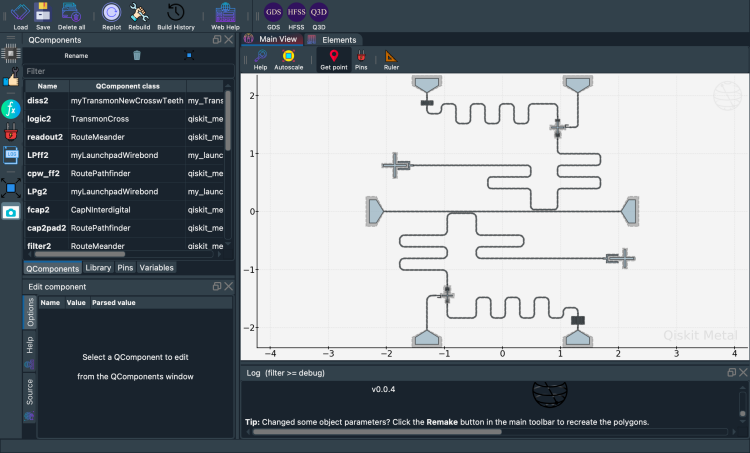

In [128]:
gui = MetalGUI(design)
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [48]:
from probe_structure import *

In [49]:
options_p = Dict(
    pos_x = '-1890um',
    pos_y = '1724um',
    cut_box_width = '650um',
    cut_box_height = '347um',
)
probe = ProbeStructure(design, 'probe', options = options_p)

In [50]:
options_p = Dict(
    pos_x = '1890um',
    pos_y = '-1724um',
    cut_box_width = '650um',
    cut_box_height = '347um',
)
probe = ProbeStructure(design, 'probe2', options = options_p)

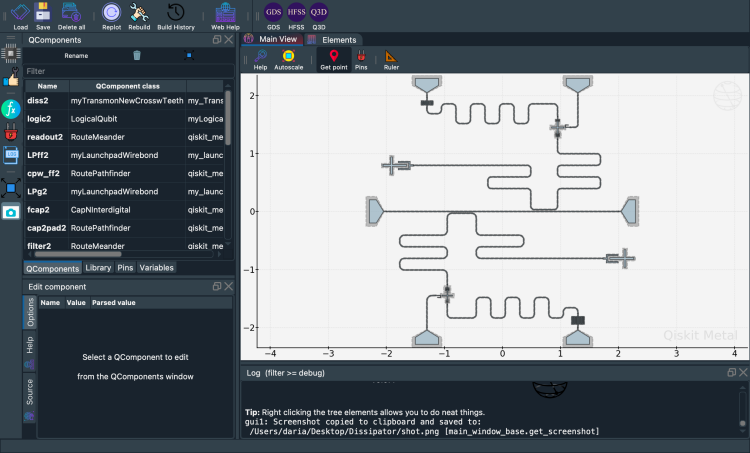

In [51]:
gui.screenshot()

# export 

In [52]:
a_gds = design.renderers.gds
a_gds.options['cheese']['view_in_file']['main'][1]=True
a_gds.options['no_cheese']['view_in_file']['main'][1]=False
a_gds.options['cheese']['edge_nocheese'] = '200um'
a_gds.options['cheese']['cheese_1_radius'] = '100um'

# a_gds.options['cheese']['cheese_0_x'] = '2um' # 4um
# a_gds.options['cheese']['cheese_0_y'] = '2um' # 4um
# a_gds.options['cheese']['delta_x'] = '12um' # 24um
# a_gds.options['cheese']['delta_y'] = '12um' # 24um
a_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: False}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [53]:
a_gds.export_to_gds(r'/Users/daria/Desktop/Dissipator/diss08_10B_base.gds')

04:01PM 28s WARNING [_import_junctions_to_one_cell]: Not able to find file:"../resources/Fake_Junctions.GDS".  Not used to replace junction. Checked directory:"/Users/daria/Desktop/resources".


1